In [1]:
train_dir = '/Users/Skmal/OneDrive/Documents/archive (7)/train'
test_dir = '/Users/Skmal/OneDrive/Documents/archive (7)/test'

In [2]:
import os
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/train/apples')))
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/train/tomatoes')))
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/test/apples')))
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/test/tomatoes')))

164
130
54
43


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)


Found 236 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [4]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [5]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [6]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [7]:
history = model.fit(train_data, epochs=22, validation_data=validation_data)

Epoch 1/22


8/8 [==============================] - 17s 2s/step - loss: 0.7933 - accuracy: 0.5085 - val_loss: 0.6847 - val_accuracy: 0.5690
Epoch 2/22
8/8 [==============================] - 14s 2s/step - loss: 0.6371 - accuracy: 0.6271 - val_loss: 0.7606 - val_accuracy: 0.6034
Epoch 3/22
8/8 [==============================] - 14s 2s/step - loss: 0.6147 - accuracy: 0.6737 - val_loss: 0.6958 - val_accuracy: 0.5690
Epoch 4/22
8/8 [==============================] - 15s 2s/step - loss: 0.5574 - accuracy: 0.7288 - val_loss: 0.6943 - val_accuracy: 0.6034
Epoch 5/22
8/8 [==============================] - 14s 2s/step - loss: 0.5101 - accuracy: 0.7458 - val_loss: 0.8064 - val_accuracy: 0.6034
Epoch 6/22
8/8 [==============================] - 14s 2s/step - loss: 0.3997 - accuracy: 0.8432 - val_loss: 0.8179 - val_accuracy: 0.6552
Epoch 7/22
8/8 [==============================] - 14s 2s/step - loss: 0.2737 - accuracy: 0.8729 - val_loss: 1.1333 - val_accuracy: 0.6724
Epoch 8/22
8/8 [================

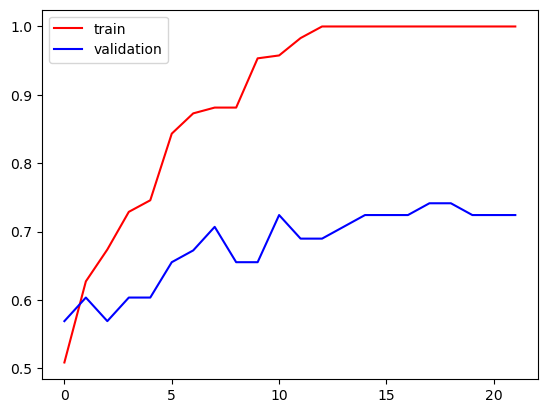

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

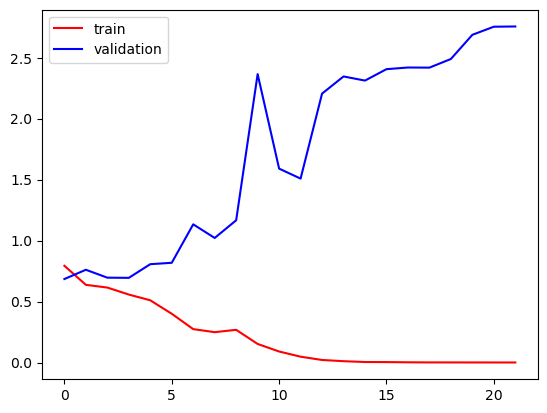

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 97 images belonging to 2 classes.


In [11]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 2s 243ms/step
[[1.64369941e-02]
 [9.99374151e-01]
 [5.94291836e-02]
 [4.49687789e-08]
 [1.00000000e+00]
 [9.96610701e-01]
 [1.45660073e-04]
 [5.72339036e-02]
 [5.17690069e-06]
 [9.88336524e-08]
 [1.44688413e-02]
 [1.00000000e+00]
 [4.12762483e-06]
 [9.99871314e-01]
 [4.20017600e-01]
 [9.82529582e-06]
 [9.97099280e-01]
 [1.36347619e-04]
 [1.15892664e-03]
 [2.48643209e-05]
 [5.95480874e-02]
 [1.00000000e+00]
 [5.32967213e-04]
 [4.39468911e-03]
 [8.95426273e-02]
 [1.00000000e+00]
 [9.99999702e-01]
 [2.85628028e-02]
 [1.48705635e-02]
 [9.82786715e-01]
 [1.00000000e+00]
 [9.74919740e-03]
 [4.11715984e-01]
 [1.39250874e-03]
 [9.99893725e-01]
 [7.27579118e-06]
 [6.65372331e-03]
 [9.99998331e-01]
 [6.02935195e-01]
 [2.87107348e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.22268683e-08]
 [9.99976099e-01]
 [9.55081403e-01]
 [9.99875128e-01]
 [1.51467175e-05]
 [3.68784470e-07]
 [9.19557571e-01]
 [6.12536724e-07]
 [1.00000000e+00]
 [3.78470315e-04]
 [1.0000000

In [12]:
len(predictions)

97

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[31 23]
 [21 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.58        54
           1       0.49      0.51      0.50        43

    accuracy                           0.55        97
   macro avg       0.54      0.54      0.54        97
weighted avg       0.55      0.55      0.55        97

